# Classifying Iris Species
#### Using K-Nearest Neighbors
-----------------


The goal of this ML application is to distinguish and classify to which species an iris flower belong to based on the data available.

The data we will be working with is **Iris** dataset contains length and width of **sepals**, length and width of **petals** and **species** with 3 classes named *setosa*, *versicolor*, or *virginica*.

### Data intro
--------------------

In [102]:
# Imports
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

# Settings
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [103]:
# Import data
from sklearn.datasets import load_iris

# load data
iris_dataset = load_iris()

# data contents
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Above are the contents of the data we loaded. We can find different objects assigned to different varaibles for the ease of use.
- column names of features are in "feature_names" and it's data in "data".
- target column name in "target_names" and data in "target".
- we can find some description in "DESCR" and location of the file in "filename"

Let's see the shape of our dataset and firsts few rows.

In [104]:
#shape of data
print("Shape of data: {}".format(iris_dataset['data'].shape))

#head of data
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

Shape of data: (150, 4)
First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


------------------
### Data exploration

We shall perform some explonatory analysis on the data before building the model to get an intuition.

- We shall check for null values in the dataset.
- check for correlation between features.

In [105]:
# we shall convert the array type dataset to a dataframe
iris_df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)

# check for null values
print("Number of null values in the dataset")
iris_df.isnull().sum()

Number of null values in the dataset


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

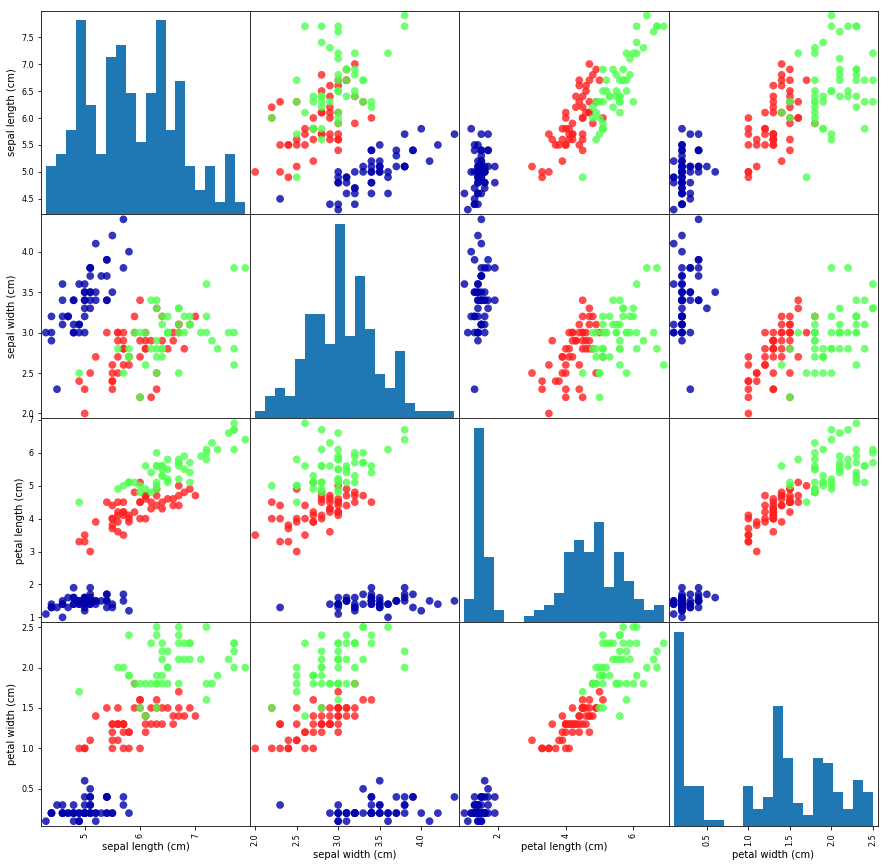

In [106]:
# check for correlation
pd.plotting.scatter_matrix(iris_df, c=iris_dataset['target'], figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3);

- There are no null values in the data.
- The pair plot shows that the classes in species are well distinguished by petal and sepal measurements, which means machine learning model will likely learn to seperate them.

Now we are good to build the machine learning model.

---------------
### Building model: K-NN

- We shall first shuffle and randomly split our data set into **train** (75%) and **test** (25%) sets.
- We will use *train set to build* the model and use the *test set to assess* the model.

In [107]:
#split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'], 
                                                    random_state=0)

let's check how data is split before using them to fit the model.

In [108]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Now let's fit the data set using K-Nearest Neighbor algorithm. 
- We will import this class from scikit learn.
- We start with parameter "n_neighbors" = 1. Meaning we will use one neighbor that is nearest to new data to predict the class.

In [109]:
#import and fit
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

#test our model on test data
y_pred = knn.predict(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

---------------------
### Model evaluation
We check how good our model performed in predicting the classes on test data using few evaluation metrics.

In [110]:
#number of correctly predicted values
print("Correctly predicted values: {} out of {}".format(np.sum(y_pred == y_test),
                                                           len(y_test)))

#measure test score
print("Test set score: {:.1f}%".format(np.mean(y_pred == y_test)*100))

Correctly predicted values: 37 out of 38
Test set score: 97.4%


For the model we trained, we achieved an accuracy of 97% which is significant. We can say that our model is good.

----------------------
### Model improvement
However, we have used only one nearest neighbor in our model. Let's tweak some parameters and see if we can improve our model.
- We shall test our model with multiple nearest neighbors to find best k-nearest neighbors.
- We shall also perform multiple K-fold cross validation on training set to imporve the model.
- We shall plot mean accuracy score for each trial and choose the best performing model.

In [111]:
from sklearn.model_selection import KFold, cross_val_score

# k-nearest neighbors cross validation function
def knn_cv(feature_cols, target_col, k_fold, k_nearest):
    knn = KNeighborsClassifier(n_neighbors = k_nearest)
    kf = KFold(n_splits=k_fold, shuffle=True, random_state=1)
    score = cross_val_score(knn, feature_cols, target_col, scoring="accuracy", cv=kf)
    return round(np.mean(score)*100, 2)


#iterate over a set of different k-nearest neighbors and kfold

knn_score_dict = {}
for k_nearest in range(1,11):
    k_fold_dict = {}
    for k_fold in range(2,10):
        k_fold_dict[k_fold] = knn_cv(iris_dataset['data'], iris_dataset['target'], k_fold, k_nearest)
    knn_score_dict[k_nearest] = k_fold_dict

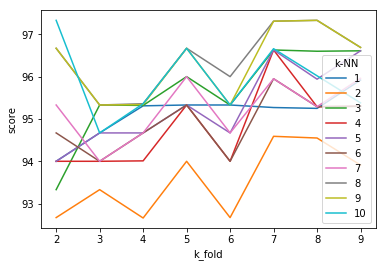

In [112]:
# plot above results from the dictionaries to find the best performing model

legend = []
for k,v in knn_score_dict.items():
    x = list(v.keys())
    y = list(v.values())
    legend.append(k)
    plt.plot(x,y)
    
plt.xlabel("k_fold")
plt.ylabel("score")
plt.legend(legend, loc='lower right', title='k-NN')
plt.show();

From the above plo we can see as the k-NN goes up the model is performing better untill a certain neighbors and certain k_fold validations and then drops down.

Let's find the best performing model parameters from the above result.

In [113]:
#find best performing k-fold and k-NN
max_list = {}
for k,v in knn_score_dict.items():
    each_knn_max_kfold_dict = {}
    each_knn_max_kfold = max(v, key=v.get)
    each_knn_max_kfold_dict[each_knn_max_kfold] = v[each_knn_max_kfold]
    max_list[k] = each_knn_max_kfold_dict

max_list

{1: {9: 95.92},
 2: {7: 94.59},
 3: {7: 96.63},
 4: {7: 96.63},
 5: {7: 96.63},
 6: {7: 95.95},
 7: {5: 96.0},
 8: {8: 97.33},
 9: {8: 97.33},
 10: {2: 97.33}}

In the above result, we have retrived the best k_fold value and accuracy score for each k-nearest neighbors. And the best performing model acheived at **8 k-nearest neighbors** and for **8 k-fold cross validations** with an accuracy score of **97.33**.

-----------------------

### Conclusion
With the given data set we are able to predict to which species a flower belongs to with an accracy rate of **97.3%**. Our initial model and final model almost gave simillar results. We can say our model is a good fit.

*Note: as we are working with a very small data set we were unable to improve the model significantly or take advantage of hyperparameter optimization.*


### Pros and Cons of K-NN model
It works reasonably well if the data set is small.

But, since this is an instance based learning algorithm
- it doesn't learn the realationship between the features and target
- it has to run all rows to predict each target each time which is computationally expensive.
- too large dataset will take too long or may time out